In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('AD.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df = df.drop(['Subject ID','MRI ID', 'Visit', 'Hand', 'MR Delay'], axis=1)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
#df = df.drop_duplicates()

number of duplicate rows:  (0, 10)


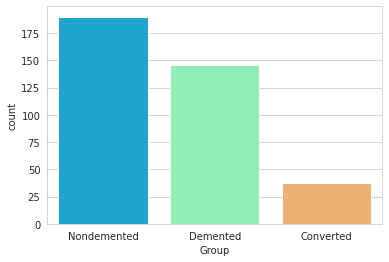

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Group',data=df,palette='rainbow')

In [ ]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

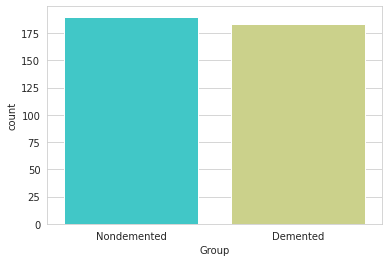

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Group',data=df,palette='rainbow')

In [ ]:
for i in range(df['M/F'].size):
    if df['M/F'][i]=='M':
        df['M/F'][i]= 0
    elif df['M/F'][i]=='F':
        df['M/F'][i] = 1 
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

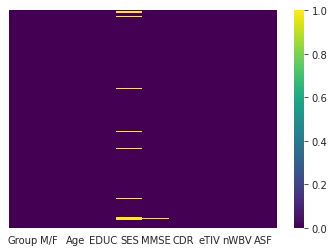

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')
df.isnull().sum()

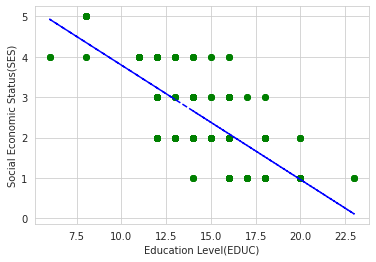

In [ ]:
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

z = np.polyfit(x, y, 1) #y = mx^1 +c
p = np.poly1d(z) # slope, intercept
plt.plot(x, y, 'go')
plt.plot(x, p(x), "b--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [ ]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

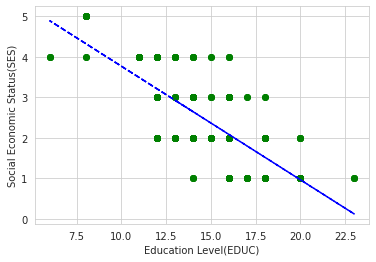

In [ ]:
x = df['EDUC']
y = df['SES']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go')
plt.plot(x, p(x), "b--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [ ]:
df=df.dropna(axis=0, how='any') ## Remove MMSE null(NaN) values 

In [ ]:
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,75,12,3.0,23.0,0.5,1678,0.736,1.046
3,1,0,76,12,3.0,28.0,0.5,1738,0.713,1.010
4,1,0,80,12,3.0,22.0,0.5,1698,0.701,1.034


In [ ]:
X=df.iloc[:,1:11]
Y=df.iloc[:,0]

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)

  Specs      Scores
5   CDR  107.733713
4  MMSE   50.556192
0   M/F    8.317937
6  eTIV    8.267758
2  EDUC    7.493717


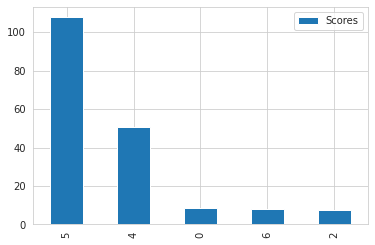

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Specs','Scores']
print(featureScores.nlargest(5,'Scores'))
featureScores.nlargest(5,'Scores').plot(kind='bar')

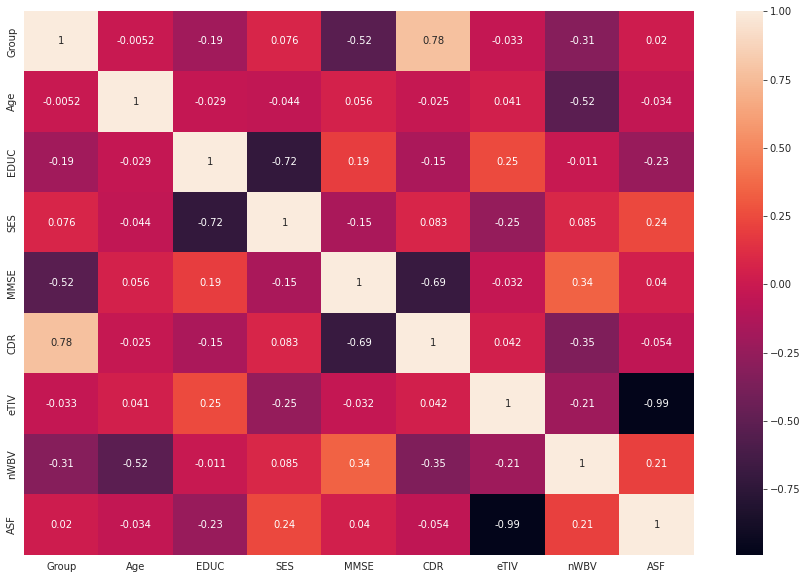

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

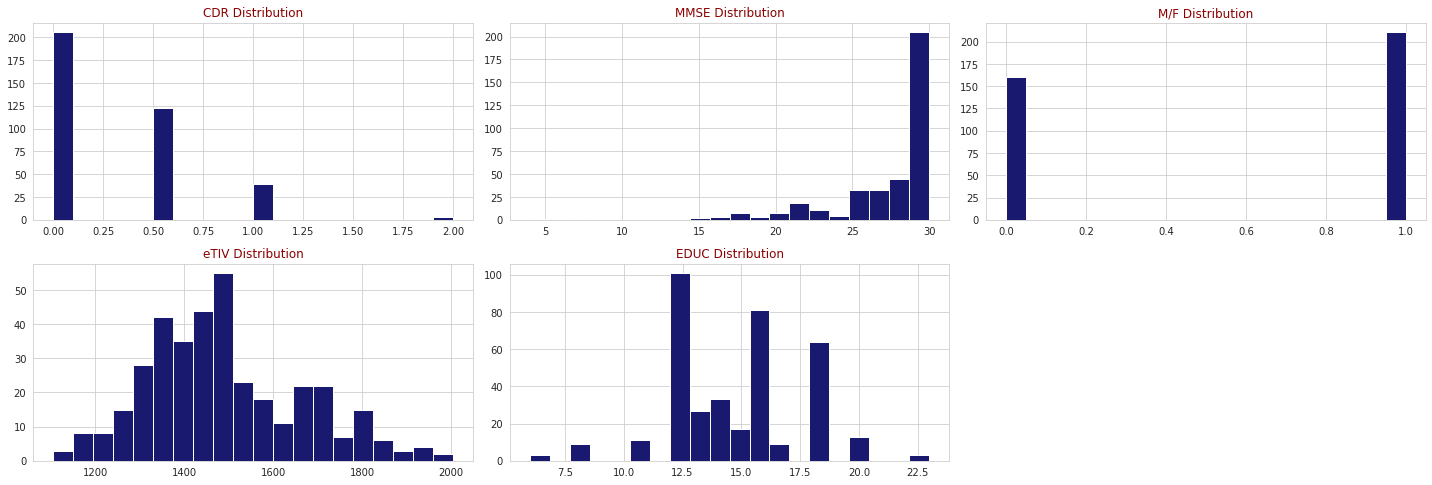

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()

fss=featureScores.nlargest(5,'Scores')
fssi=fss.reset_index()
fs=fssi.Specs
draw_histograms(df,fs,6,3)

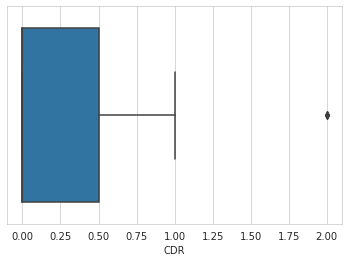

In [ ]:
sns.boxplot(x=df['CDR'])

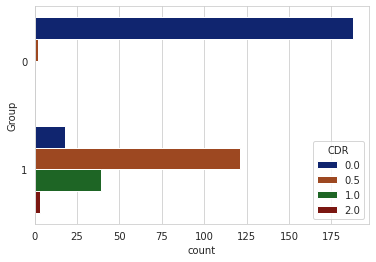

In [ ]:
sns.set_style('whitegrid')
sns.countplot(y='Group',hue='CDR',data=df,palette="dark")

In [ ]:
X=df[fs].values
Y=df['Group'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred=classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.967741935483871

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.98      0.96      0.97        49

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

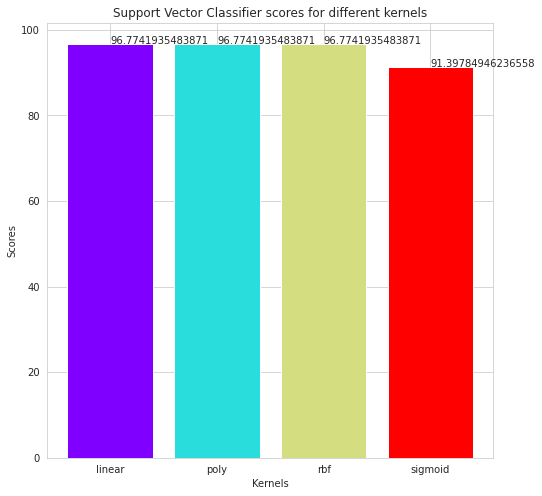

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, Y_train)
    svc_scores.append(svc_classifier.score(X_test, Y_test)*100)
from matplotlib.cm import rainbow    
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(8,8)) 
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
    
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [ ]:
classifier2 = SVC(kernel = 'rbf', random_state = 0 ,probability=True)
classifier2.fit(X_train, Y_train)

SVC(probability=True, random_state=0)

In [ ]:
y_pred2 = classifier2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred2)*100

96.7741935483871

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred2)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.98      0.96      0.97        49

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



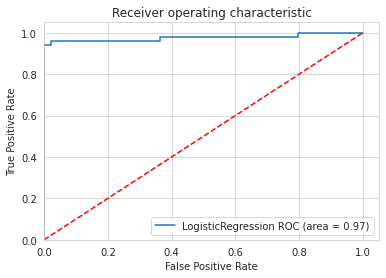

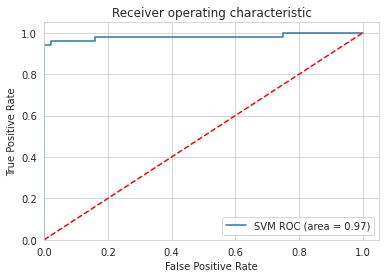

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
models = [{'model': classifier,'label':'LogisticRegression'},{'model': classifier2,'label':'SVM'}]
for m in models:
    model = m['model']
    model.fit(X_train,Y_train)
    roc_auc = roc_auc_score(Y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('svm_ROC')
    plt.show()